# &#127865; Purpose Of This Notebook:
* Learn uses basic sk-learn classification algorithm.
* Learn bacic ANN coding with keras api.
* This NoteBook shows you to uses of various sklearn regression models and compare between them.
* Also shows some different performance on same algorithm on train and test set.

# &#128209; Titanic Problem:
In this titanic problem we need to predict the passenger is survived or not.

* LINK : https://www.kaggle.com/harunshimanto/learning-basic-ml-by-titanic-survival-prediction

# 🔗 Important library and function...

In [ ]:
import numpy as np
from numpy import array
from numpy import argmax
import pandas as pd
from sklearn.preprocessing import scale, MinMaxScaler
from keras.utils import to_categorical

import seaborn as sb
import matplotlib.pyplot as plt
import pandas_profiling

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam, SGD

from sklearn.metrics import accuracy_score, log_loss, average_precision_score, f1_score, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#💉 Import train & test data...

Titanic Dataset Download link:
* Train : "https://www.kaggle.com/c/titanic/download/train.csv"
* Test  : "https://www.kaggle.com/c/titanic/download/test.csv"

In [ ]:
data_frame_train = pd.read_csv('/content/drive/My Drive/Google Colab/Data_Science/Titanic/Data/train.csv')
data_frame_test = pd.read_csv('/content/drive/My Drive/Google Colab/Data_Science/Titanic/Data/test.csv')

#📄 Analyze train data set...

In [ ]:
data_frame_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print('Total row col of train data : ',data_frame_train.shape[0],' ',data_frame_train.shape[1])
print('Total row col of test data  : ',data_frame_test.shape[0],' ',data_frame_test.shape[1])

Total row col of train data :  891   12
Total row col of test data  :  418   11


# 📑 Data Pre-processing...

In [ ]:
data_frame_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data_frame_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<h2>1. NULL or Missing data checking:<h2>
<ul>
<li>Age column has 177 null data in train and 86 in test data.
<li>Cabin column has 687 null data in train and 327 in test data.
<li>Embarked has 2 missing value.</li>
</ul>

In [ ]:
data_frame_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data_frame_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h2>2. NULL value of Age column fill with it's median value:

In [ ]:
data_frame_train['Age'] = data_frame_train['Age'].fillna(data_frame_train['Age'].median())
data_frame_test['Age'] = data_frame_test['Age'].fillna(data_frame_test['Age'].median())
data_frame_test['Fare'] = data_frame_test['Fare'].fillna(0)

In [ ]:
data_frame_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<h2>3. Missing value of Embarked column fill with 'S' because the frequency of 'S' is more higher then other two 'C', 'Q':

In [ ]:
data_frame_train['Embarked'] = data_frame_train['Embarked'].fillna('S')
data_frame_test['Embarked'] = data_frame_test['Embarked'].fillna('S')

<h2>4. Categorical convertion :
<ul>
<li>Value of Sex convert to male = 0, female = 1.
<li>Value of Embarked S = 0, C = 1, Q = 2

In [ ]:
data_frame_train['Sex'] = pd.factorize(data_frame_train.Sex)[0]
data_frame_test['Sex'] = pd.factorize(data_frame_test.Sex)[0]

data_frame_train['Embarked'] = pd.factorize(data_frame_train.Embarked)[0]
data_frame_test['Embarked'] = pd.factorize(data_frame_test.Embarked)[0]

In [ ]:
print('After converting categorical Sex data to numerical      :',data_frame_train.Sex.unique())
print('After converting categorical Embarked data to numerical :',data_frame_train.Embarked.unique())

After converting categorical Sex data to numerical      : [0 1]
After converting categorical Embarked data to numerical : [0 1 2]


<h2> After convertion of data its look like as below.

In [ ]:
data_frame_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [ ]:
data_frame_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<h2>5. Cabin and Ticket data exploit :
<ul>
<li> Cabin and Ticket is categorical data.
<li> Cabin column has 147 uniq value and Ticket has 681 uniq data.
<li> Which is hard to convert in numerical value (except strong statistical calculation).

In [ ]:
data_frame_train['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [ ]:
data_frame_train['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [ ]:
print('Total unique feature in Cabin column :',data_frame_train['Cabin'].nunique())
print('Total unique feature in Ticket column :',data_frame_train['Ticket'].nunique())

Total unique feature in Cabin column : 147
Total unique feature in Ticket column : 681


<h2> Droping Ticket, Cabin, Name column.

In [ ]:
data_frame_train = data_frame_train.drop(['Ticket'], axis=1)
data_frame_train = data_frame_train.drop(['Cabin'], axis=1)
data_frame_train = data_frame_train.drop(['Name'], axis=1)

In [ ]:
data_frame_test = data_frame_test.drop(['Ticket'], axis=1)
data_frame_test = data_frame_test.drop(['Cabin'], axis=1)
data_frame_test = data_frame_test.drop(['Name'], axis=1)

In [ ]:
data_frame_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


<h2>6. Converting float64 Age, float64 Fare to int64.

In [ ]:
data_frame_test['Age'] = data_frame_test['Age'].astype(int)
data_frame_test['Fare'] = data_frame_test['Fare'].astype(int)

data_frame_train['Age'] = data_frame_train['Age'].astype(int)
data_frame_train['Fare'] = data_frame_train['Fare'].astype(int)

In [ ]:
data_frame_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   Age          418 non-null    int64
 4   SibSp        418 non-null    int64
 5   Parch        418 non-null    int64
 6   Fare         418 non-null    int64
 7   Embarked     418 non-null    int64
dtypes: int64(8)
memory usage: 26.2 KB


#📈 Data Visualization...

<h3> 1. Coorelation with entire feature of train data.

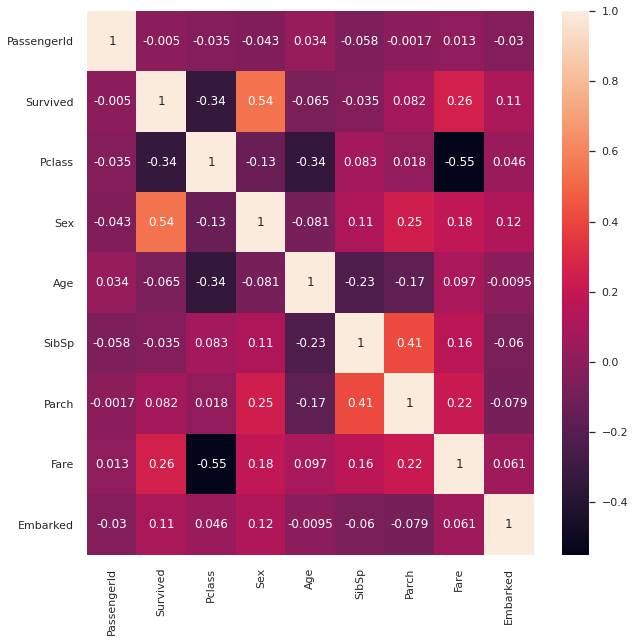

In [ ]:
sb.set(rc={'figure.figsize':(10,10)})
sb.heatmap(data_frame_train.corr(), annot = True)

In [ ]:
data_frame_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34,0,0,7,0
1,893,3,1,47,1,0,7,1
2,894,2,0,62,0,0,9,0
3,895,3,0,27,0,0,8,1
4,896,3,1,22,1,1,12,1


In [ ]:
data_frame_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22,1,0,7,0
1,2,1,1,1,38,1,0,71,1
2,3,1,3,1,26,0,0,7,0
3,4,1,1,1,35,1,0,53,0
4,5,0,3,0,35,0,0,8,0


<h3> 2. Coorelation with entire feature of train data in seaborn.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


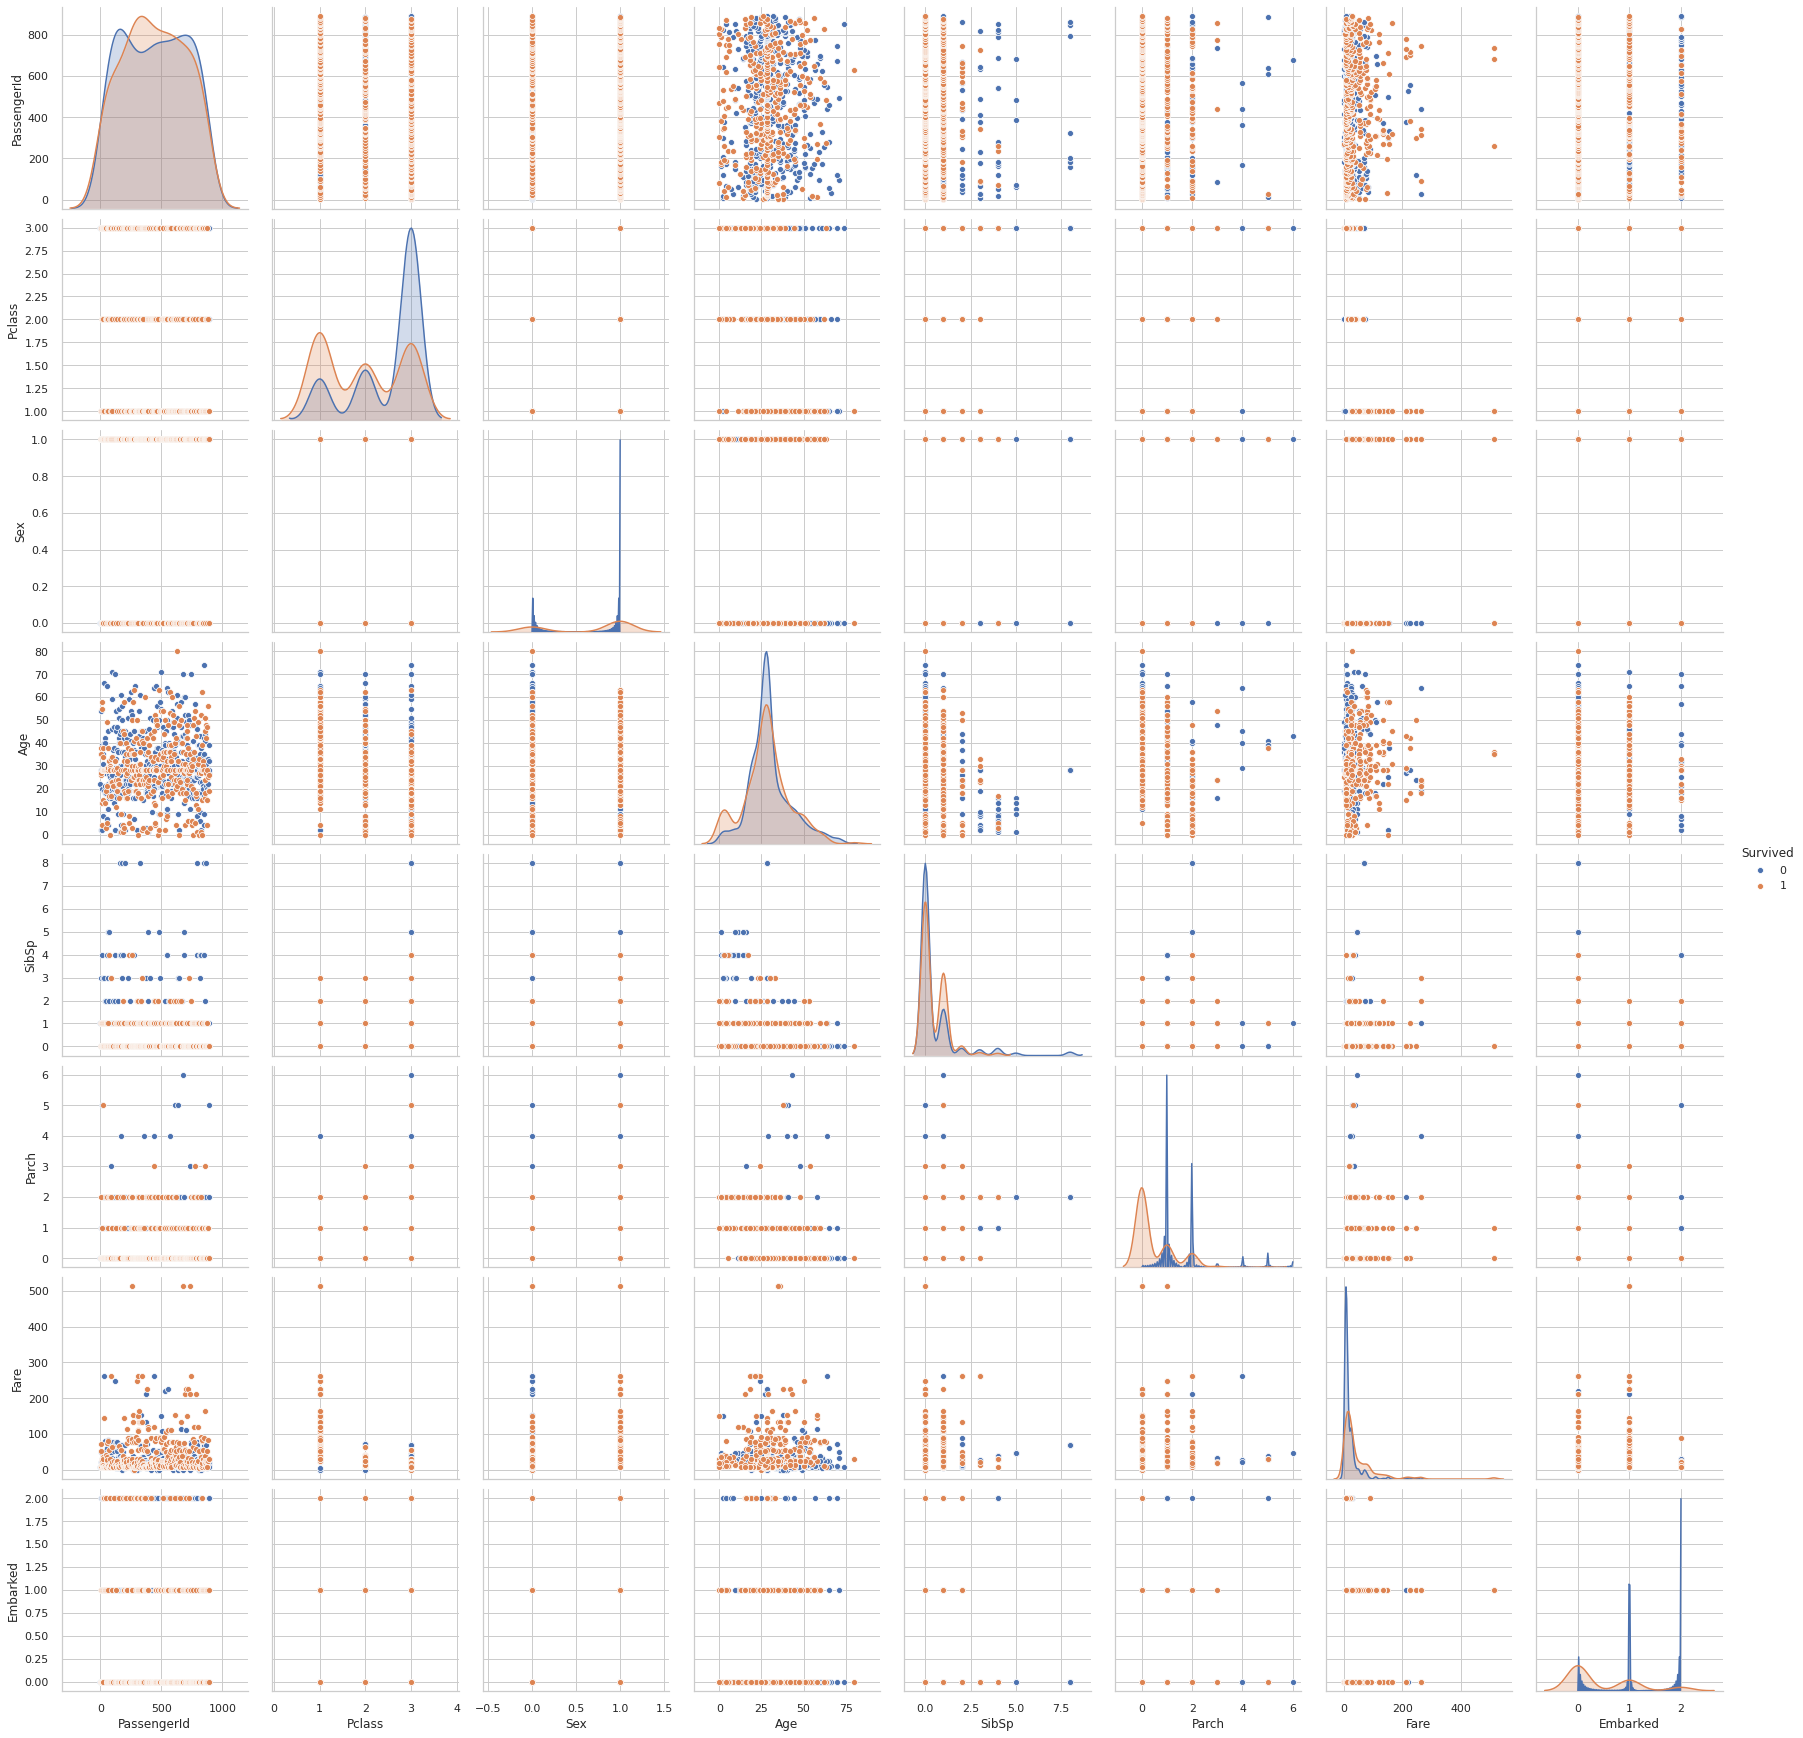

In [ ]:
sb.set_style("whitegrid");
sb.pairplot(data_frame_train, hue="Survived", size=3);
#sb.pairplot(data_frame_train, kind="reg", hue="Survived")
plt.show()

<h3> 3. Sex and Survived.

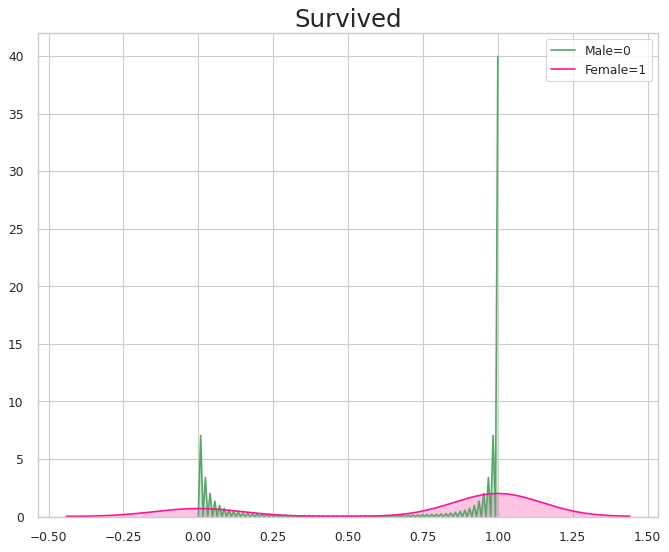

In [ ]:
plt.figure(figsize=(10,8), dpi= 80)
sb.kdeplot(data_frame_train.loc[data_frame_train['Sex'] == 0, "Survived"], shade=True, color="g", label="Male=0")
sb.kdeplot(data_frame_train.loc[data_frame_train['Sex'] == 1, "Survived"], shade=True, color="deeppink", label="Female=1")
# Decoration
plt.title('Survived', fontsize=22)
plt.legend()
plt.show()

<h3> 4. Age, Sex, Survived.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1200x1200 with 0 Axes>

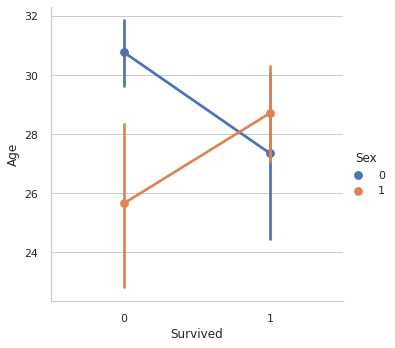

In [ ]:
plt.figure(figsize=(15,15), dpi= 80)
sb.factorplot('Survived', 'Age', data=data_frame_train, hue='Sex')
plt.show()

<h3> 5. Age, Sex.

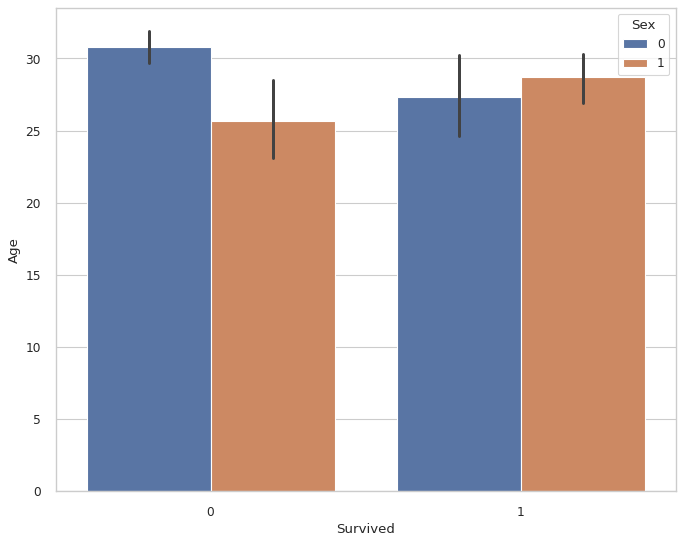

In [ ]:
plt.figure(figsize=(10,8), dpi= 80)
sb.barplot('Survived','Age',data=data_frame_train,hue='Sex')
plt.show()

<h3> 6. Sex, Survived.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


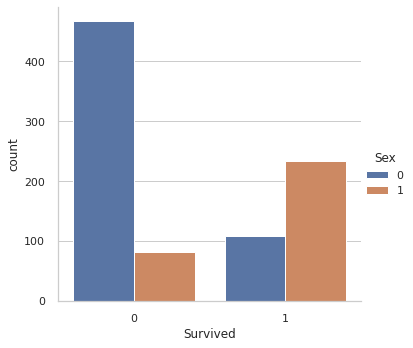

In [ ]:
sb.factorplot('Survived',data=data_frame_train,kind='count',hue='Sex')
plt.show()

<h3> 7. Sex, Survived and Pclass.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


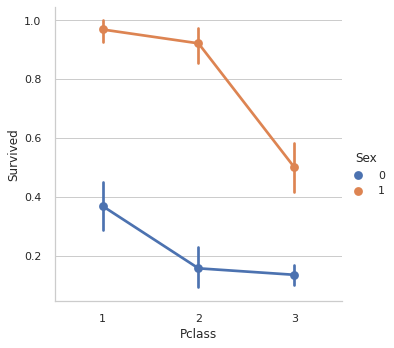

In [ ]:
sb.factorplot("Pclass", "Survived", hue = "Sex", data = data_frame_train)
plt.show()

<h3> 8. More generalize the coorelation between Sex, Survived, Pclass.

In [ ]:
pd.crosstab([data_frame_train["Sex"], data_frame_train["Survived"]], data_frame_train["Pclass"], 
            margins = True).style.background_gradient(cmap = "summer_r")

<h3> 9. Visualization of generalized the coorelation between Sex, Survived, Pclass.

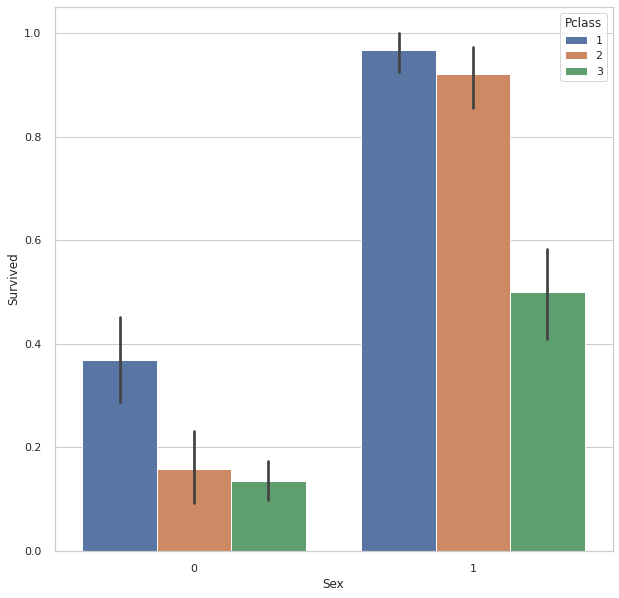

In [ ]:
sb.barplot(x = "Sex", y = "Survived", hue = "Pclass", data = data_frame_train)
plt.show()

<h3> 10. Visualization of the coorelation between Sex, Survived, Embarked.

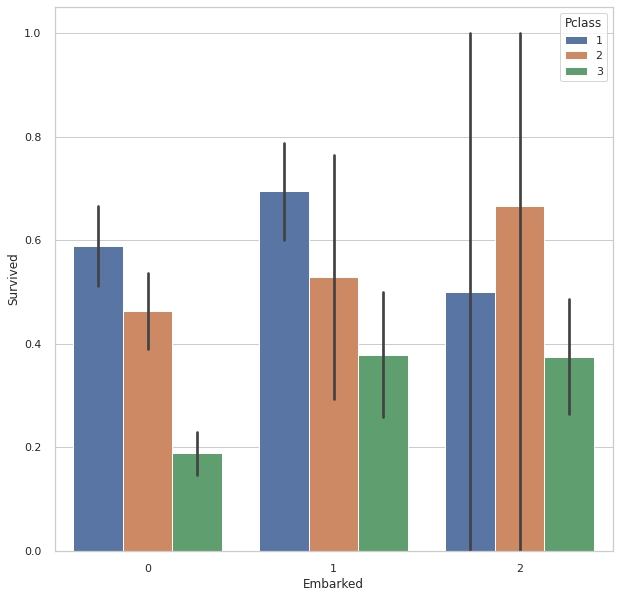

In [ ]:
sb.barplot(x = "Embarked", y = "Survived", hue = "Pclass", data = data_frame_train)
plt.show()

<h3> 11. More visualization of generalized the coorelation between Sex, Survived, Pclass.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


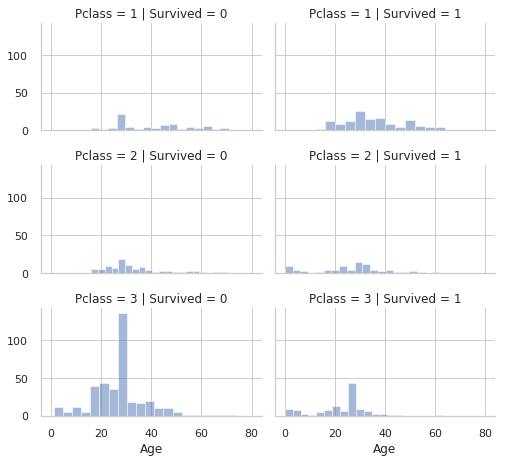

In [ ]:
grid = sb.FacetGrid(data_frame_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();
#plt.xkcd()

#📝 Feature selection...

In [ ]:
data_frame_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22,1,0,7,0
1,2,1,1,1,38,1,0,71,1
2,3,1,3,1,26,0,0,7,0
3,4,1,1,1,35,1,0,53,0
4,5,0,3,0,35,0,0,8,0


In [ ]:
data_frame_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34,0,0,7,0
1,893,3,1,47,1,0,7,1
2,894,2,0,62,0,0,9,0
3,895,3,0,27,0,0,8,1
4,896,3,1,22,1,1,12,1


In [ ]:
drop_feature = ['PassengerId','Survived']
x_train = data_frame_train.drop(drop_feature, axis=1)
y_train = data_frame_train['Survived']
x_test = data_frame_test.drop('PassengerId', axis=1)

#🔪 Split the data as train and test for our algorithm...

In [ ]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22,1,0,7,0
1,1,1,38,1,0,71,1
2,3,1,26,0,0,7,0
3,1,1,35,1,0,53,0
4,3,0,35,0,0,8,0


In [ ]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34,0,0,7,0
1,3,1,47,1,0,7,1
2,2,0,62,0,0,9,0
3,3,0,27,0,0,8,1
4,3,1,22,1,1,12,1


#<h2>🖨 Normalize the data with minmax scaler...

In [ ]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
x_train_scaled[0] # Age 80 SibSp 8 Fare 511.999

array([1.        , 0.        , 0.275     , 0.125     , 0.        ,
       0.01367188, 0.        ])

#🔌 Train Titanic data in different ML algorithms...

<h3>1. LogisticRegression

Logistic regression is a classification process where the threshold value are involved. Logistic regression used sigmoid function.
![Imgur](https://i.imgur.com/y35zaKt.jpg) 
![Imgur](https://i.imgur.com/qun2DpM.jpg)

In [ ]:
clf = LogisticRegression()

clf.fit(x_train_scaled, y_train)
y_pred_log_reg = clf.predict(x_test_scaled)
acc_log_reg = round( clf.score(x_train_scaled, y_train) * 100, 2)
print (str(acc_log_reg) + ' %')

79.91 %


<h3>2. SVC

Support Vector Machine classify data based on Maximum Margin and Support vectors.
![Imgur](https://i.imgur.com/BYVuAUG.jpg)

In [ ]:
clf = SVC()

clf.fit(x_train_scaled, y_train)
y_pred_svc = clf.predict(x_test_scaled)
acc_svc = round(clf.score(x_train_scaled, y_train) * 100, 2)
print (str(acc_svc) + '%')

81.48%


<h3>3. LinearSVC

In [ ]:
clf = LinearSVC()

clf.fit(x_train_scaled, y_train)
y_pred_linear_svc = clf.predict(x_test_scaled)
acc_linear_svc = round(clf.score(x_train_scaled, y_train) * 100, 2)
print (str(acc_linear_svc) + '%')

79.8%


<h3>4. SGDClassifier

Stochastic Gradient Descent classifier worked with finding the global minimum.
![Imgur](https://i.imgur.com/PlyGL3y.jpg)

In [ ]:
from sklearn.linear_model import SGDClassifier
# sgd = linear_model.SGDClassifier()
sgd = SGDClassifier()

sgd.fit(x_train_scaled, y_train)
Y_pred = sgd.predict(x_test_scaled)
sgd.score(x_train_scaled, y_train)
acc_sgd = round(sgd.score(x_train_scaled, y_train) * 100, 2)
print(str(acc_sgd)+'%')

79.01%


<h3>5. RandomForestClassifier

Random Forest Classifier classify classes based on majority voting system.
![Imgur](https://i.imgur.com/trUUiO8.jpg)

In [ ]:
clf = RandomForestClassifier()

clf.fit(x_train_scaled, y_train)
Y_prediction_randomforest = clf.predict(x_test_scaled)
clf.score(x_train_scaled, y_train)
acc_random_forest = round(clf.score(x_train_scaled, y_train) * 100, 2)
print(str(acc_random_forest) + '%')

96.18%


<h3>6. KNeighborsClassifier

K-nearest neighbors algorithm classify classes using calculating distance with selecting neighbors.
![Imgur](https://i.imgur.com/E5Qnexh.png)

In [ ]:
clf = KNeighborsClassifier()

clf.fit(x_train_scaled, y_train)
y_pred_knn = clf.predict(x_test_scaled)
acc_knn = round(clf.score(x_train_scaled, y_train) * 100, 2)
print (str(acc_knn)+'%')

84.96%


<h3>7. DecisionTreeClassifier

In Decision Tree Classifier to classify class according with some particular conditions.
![Imgur](https://i.imgur.com/wFSXq7M.jpg)

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(x_train_scaled, y_train)
y_pred_decision_tree = clf.predict(x_test_scaled)
acc_decision_tree = round(clf.score(x_train_scaled, y_train) * 100, 2)
print (str(acc_decision_tree) + '%')

96.18%


<h3>8. GaussianNB

Gaussian NB follow this equation to classify different class.
![Imgur](https://i.imgur.com/z1TLOj3.jpg)

In [ ]:
clf = GaussianNB()

clf.fit(x_train_scaled, y_train)
y_pred_gnb = clf.predict(x_test_scaled)
acc_gnb = round(clf.score(x_train_scaled, y_train) * 100, 2)
print (str(acc_gnb) + '%')

79.24%


#<h2>👑 Confusion matrix of DecisionTreeClassifier which gives us best accuracy...

96.18%
Confusion Matrix
[[546   3]
 [ 31 311]]


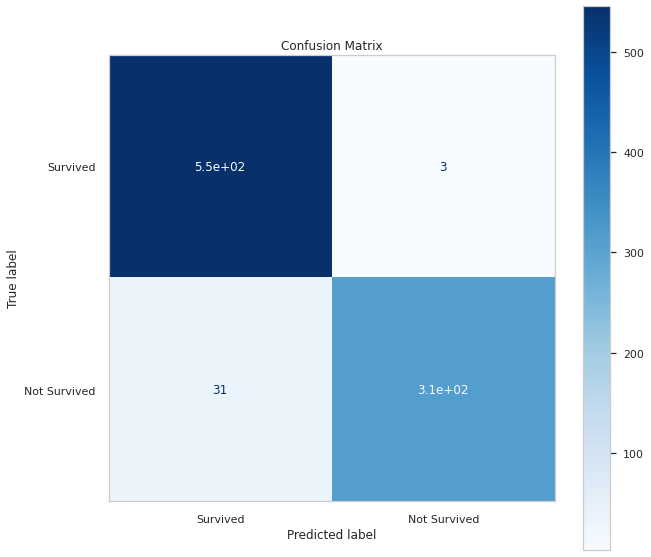

In [ ]:
clf = DecisionTreeClassifier()

classifier = clf.fit(x_train_scaled, y_train)
Y_prediction_randomforest = clf.predict(x_train_scaled)
acc_random_forest = round(clf.score(x_train_scaled, y_train) * 100, 2)
print(str(acc_random_forest) + '%')

class_names = ['Survived', 'Not Survived']
title = 'Confusion Matrix'
np.set_printoptions(precision=3)

disp = plot_confusion_matrix(classifier, x_train_scaled, y_train, display_labels=class_names, cmap=plt.cm.Blues)
plt.grid(False)
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)
plt.show()

#<h2>🧤 Lets try Artificial Neural Network for our training...

See some animation , Just enjoy.
<a href="https://imgur.com/UKk7AGb"><img src="https://i.imgur.com/UKk7AGb.gif" title="source: imgur.com" /></a><br>
This is the Human neuron architecture from where modern Artificial Neural Network get the concept.
![Imgur](https://i.imgur.com/Z8bbVYd.jpg)<br>
This the conversion form of human neuron, where designed a neuron in artificial way. Or you can say mimic the human neuron.
![Imgur](https://i.imgur.com/F6XO0Mx.jpg)<br>
This is the basic ANN building block, where hidden layer input and output are shown.
![Imgur](https://i.imgur.com/WWx45SV.jpg)

<h3>1. Version one of ANN which has two layer.

In [ ]:
model = Sequential()
model.add(Dense(4, input_shape=(7,), activation='relu'))
model.add(Dense(1,  activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=.001), metrics=['accuracy'])
model.summary()
history = model.fit(x_train_scaled, y_train, epochs=1000) # y_test_bin
#history = model.fit(x_train, y_train_bin, epochs=1000, validation_data=[x_test, y_test_bin])
#result = model.evaluate(x_test, y_test_bin)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 32        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
891/891 [==============================] - 0s 130us/step - loss: 0.6627 - accuracy: 0.6105
Epoch 2/1000
891/891 [==============================] - 0s 37us/step - loss: 0.6624 - accuracy: 0.6105
Epoch 3/1000
891/891 [==============================] - 0s 40us/step - loss: 0.6621 - accuracy: 0.6105
Epoch 4/1000
891/891 [==============================] - 0s 39us/step - loss: 0.6617 - accuracy: 0.6105
Epoch 5/1000
891/891 [==============================] - 0s 37us/step - loss: 0.6614 - accuracy: 0.6105
Epoc

<h3>2. Version two of ANN which has one layer.

In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=(7,), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=.001), metrics=['accuracy'])
model.summary()
history = model.fit(x_train_scaled, y_train, epochs=1000) # y_test_bin
#result = model.evaluate(x_test, y_test_bin)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
891/891 [==============================] - 0s 91us/step - loss: 0.5997 - accuracy: 0.7116
Epoch 2/1000
891/891 [==============================] - 0s 38us/step - loss: 0.5993 - accuracy: 0.7116
Epoch 3/1000
891/891 [==============================] - 0s 35us/step - loss: 0.5989 - accuracy: 0.7116
Epoch 4/1000
891/891 [==============================] - 0s 31us/step - loss: 0.5985 - accuracy: 0.7104
Epoch 5/1000
891/891 [==============================] - 0s 33us/step - loss: 0.5981 - accuracy: 0.7104
Epoch 6/1000
891/891 [==============================] - 0s 36us/step - loss: 0.5977 - accuracy: 0.7104
Epoch 7/1000
891/891 [==============

#<h2>💕 Comparison between different ML algorithm...

<h3>1. v1

In [ ]:
classifiers_set_1 = [
    LinearSVC(),
    SGDClassifier(),
    ]

for clf in classifiers_set_1:

  name = clf.__class__.__name__
  clf.fit(x_train_scaled, y_train)

  y_pred_decision_tree = clf.predict(x_train_scaled)
  acc = accuracy_score(y_train, y_pred_decision_tree)
  print('{:<25}'.format(name),": ", " Accuracy: {:.2%}".format(acc))

LinearSVC                 :   Accuracy: 79.80%
SGDClassifier             :   Accuracy: 79.12%


<h3>2. v2 all algorithm including ANN.

In [ ]:
classifiers_set_2 = [
    LogisticRegression(),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    ]

acc_loss = pd.DataFrame(columns=["Classifier", "Accuracy", "Log Loss"])

print('Accuracy and Loss for Train data in different Classifier : \n')

for clf in classifiers_set_2:
  name = clf.__class__.__name__
  clf.fit(x_train_scaled, y_train)

  y_pred_decision_tree = clf.predict(x_train_scaled)
  acc = accuracy_score(y_train, y_pred_decision_tree)

  y_pred_decision_tree = clf.predict_proba(x_train_scaled)
  loss = log_loss(y_train, y_pred_decision_tree)

  print('{:<25}'.format(name),": ", " Accuracy: {:.2%}".format(acc)," Loss: {:.1}".format(loss))
  
  temp = pd.DataFrame([[name, acc*100, loss]], columns=["Classifier", "Accuracy", "Log Loss"])
  acc_loss = acc_loss.append(temp)

# For ANN
ann_res = model.evaluate(x_train_scaled, y_train,steps=None)
print('{:<25}'.format('ANN'),": ", " Accuracy: {:.2%}".format(ann_res[1])," Loss: {:.1}".format(ann_res[0]))
temp = pd.DataFrame([['ANN', ann_res[1]*100, ann_res[0]]], columns=["Classifier", "Accuracy", "Log Loss"])
acc_loss = acc_loss.append(temp)

Accuracy and Loss for Train data in different Classifier : 

LogisticRegression        :   Accuracy: 79.91%  Loss: 0.4
SVC                       :   Accuracy: 79.35%  Loss: 0.5
NuSVC                     :   Accuracy: 80.81%  Loss: 0.5
RandomForestClassifier    :   Accuracy: 96.18%  Loss: 0.1
KNeighborsClassifier      :   Accuracy: 84.96%  Loss: 0.5
DecisionTreeClassifier    :   Accuracy: 96.18%  Loss: 0.07
GaussianNB                :   Accuracy: 79.24%  Loss: 0.6
891/891 [==============================] - 0s 36us/step
ANN                       :   Accuracy: 81.26%  Loss: 0.5


<h3>3. Accuracy and Loss according to Classifiers.

In [ ]:
acc_loss

,Classifier,Accuracy,Log Loss
0,LogisticRegression,79.910213,0.443965
0,SVC,79.349046,0.467900
0,NuSVC,80.808081,0.462307
0,RandomForestClassifier,96.184063,0.146466
0,KNeighborsClassifier,84.960718,0.487978
0,DecisionTreeClassifier,96.184063,0.073185
0,GaussianNB,79.236813,0.638668
0,ANN,81.257015,0.471835


<h3>4. Visualization of Accuracy of different classifier.

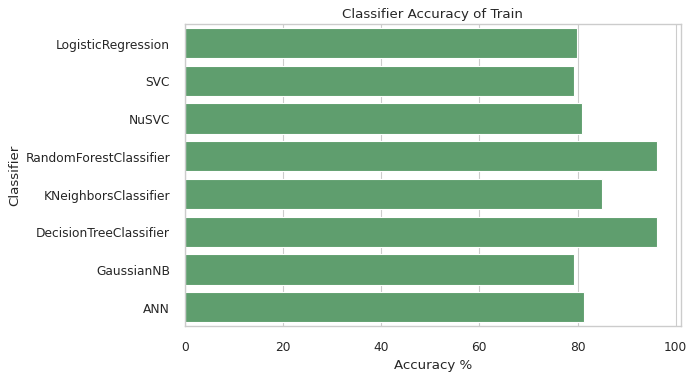

In [ ]:
plt.figure(figsize=(8,5), dpi= 80)
sb.barplot(x='Accuracy', y='Classifier', data=acc_loss, color="g")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy of Train')
plt.show()

<h3>5. Visualization of Loss of different classifier.

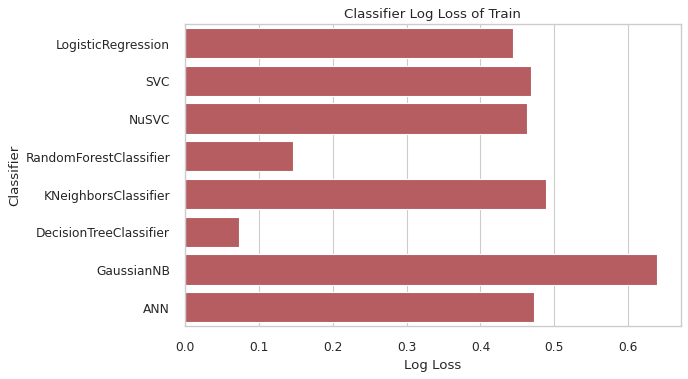

In [ ]:
plt.figure(figsize=(8,5), dpi= 80)
sb.barplot(x='Log Loss', y='Classifier', data=acc_loss, color="r")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss of Train')
plt.show()

#<h2>⚙  Lets Check the test data set with those algorithms...

<h3>1. Importing submission data of test.

In [ ]:
pred_res = pd.read_csv('/content/drive/My Drive/Google Colab/Data_Science/Titanic/Data/gender_submission.csv')
y_test = pred_res['Survived']
all_id = pred_res['PassengerId']

<h3>2. Run those alogorithm with test data and check the accuracy and loss difference.

In [ ]:
classifiers_set_3 = [
    LogisticRegression(),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    ]

acc_loss_2 = pd.DataFrame(columns=["Classifier", "Accuracy", "Log Loss"])
print('Accuracy and Loss for Test data in different Classifier : \n')
for clf in classifiers_set_3:
  name = clf.__class__.__name__
  clf.fit(x_train_scaled, y_train)

  y_pred_decision_tree = clf.predict(x_test_scaled)
  acc = accuracy_score(y_test, y_pred_decision_tree)

  y_pred_decision_tree = clf.predict_proba(x_test_scaled)
  loss = log_loss(y_test, y_pred_decision_tree)

  print('{:<25}'.format(name),": ", " Accuracy: {:.2%}".format(acc)," Loss: {:.1}".format(loss))
  
  temp = pd.DataFrame([[name, acc*100, loss]], columns=["Classifier", "Accuracy", "Log Loss"])
  acc_loss_2 = acc_loss_2.append(temp)

# For ANN
#ann_res = model.evaluate(x_train_scaled, y_train,steps=None)
#temp = pd.DataFrame([['ANN', ann_res[1]*100, ann_res[0]]], columns=["Classifier", "Accuracy", "Log Loss"])
#acc_loss = acc_loss.append(temp)

Accuracy and Loss for Test data in different Classifier : 

LogisticRegression        :   Accuracy: 93.06%  Loss: 0.3
SVC                       :   Accuracy: 99.52%  Loss: 0.2
NuSVC                     :   Accuracy: 99.52%  Loss: 0.2
RandomForestClassifier    :   Accuracy: 82.54%  Loss: 0.4
KNeighborsClassifier      :   Accuracy: 87.56%  Loss: 0.3
DecisionTreeClassifier    :   Accuracy: 72.01%  Loss: 1e+01
GaussianNB                :   Accuracy: 90.19%  Loss: 0.7


<h3>* Here we see that SVC and NuSVC are performed better then DecisionTreeClassifier and RandomForestClassifier.

<h3>3. Visulization of accuracy with test data.

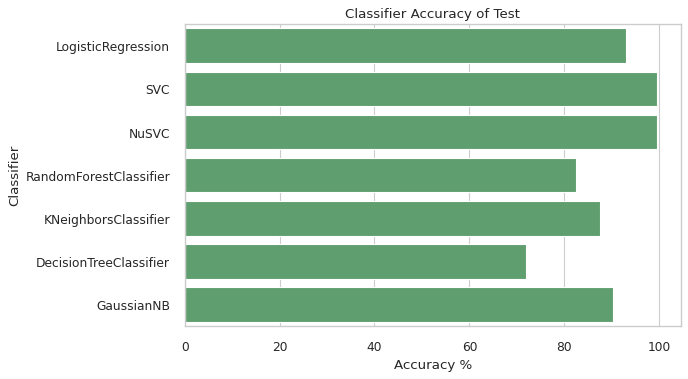

In [ ]:
plt.figure(figsize=(8,5), dpi= 80)
sb.barplot(x='Accuracy', y='Classifier', data=acc_loss_2, color="g")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy of Test')
plt.show()

<h3>4. Visulization of loss with test data.

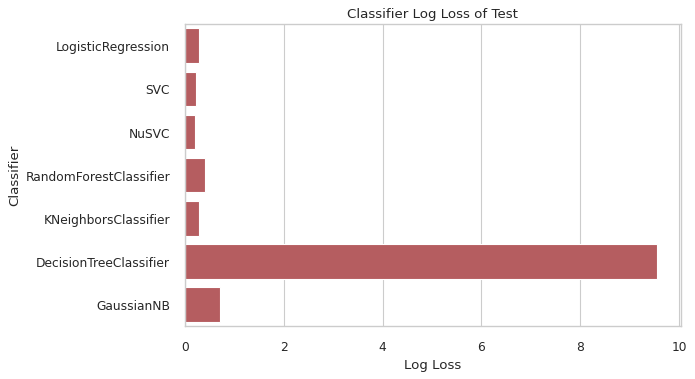

In [ ]:
plt.figure(figsize=(8,5), dpi= 80)
sb.barplot(x='Log Loss', y='Classifier', data=acc_loss_2, color="r")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss of Test')
plt.show()

#<h2>👑 Confusion matrix of SVC which gives us best accuracy...

Accuracy : 99.522%
Confusion Matrix
[[266   0]
 [  2 150]]


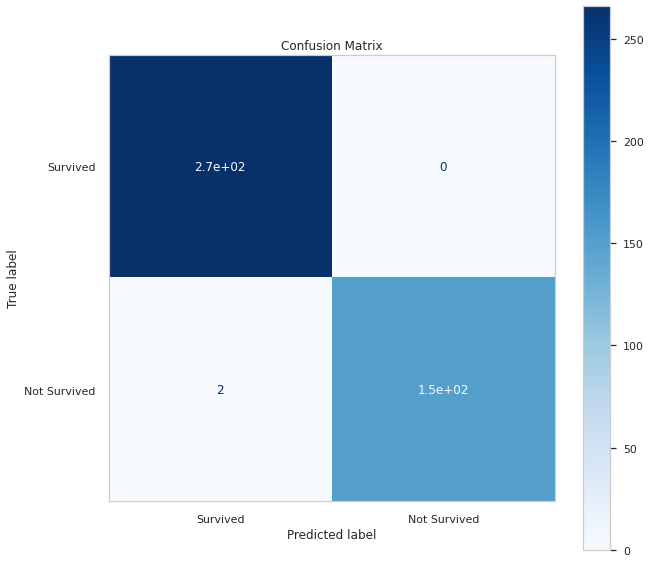

In [ ]:
clf = SVC(kernel="rbf", C=0.025, probability=True)

classifier = clf.fit(x_train_scaled, y_train)
y_pred_decision_tree = clf.predict(x_test_scaled)
acc_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print ("Accuracy : {:.3%}".format(acc_decision_tree))

class_names = ['Survived', 'Not Survived']
title = 'Confusion Matrix'
#np.set_printoptions(precision=2)

disp = plot_confusion_matrix(classifier, x_test_scaled, y_test, display_labels=class_names, cmap=plt.cm.Blues)
plt.grid(False)
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)

In [ ]:
clf = SVC(kernel="rbf", C=0.025, probability=True)

classifier = clf.fit(x_train_scaled, y_train)
y_pred_decision_tree = clf.predict(x_test_scaled)
acc_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print ("Accuracy : {:.3%}".format(acc_decision_tree))

Accuracy : 99.522%


In [ ]:
#cd /content/drive/My Drive/Google Colab/Data_Science/Titanic

#<h2>📀 Save the model...

In [ ]:
import pickle
# now you can save it to a file
with open('/content/drive/My Drive/Google Colab/Data_Science/Titanic/Titanic_99.pkl', 'wb') as f:
    pickle.dump(clf, f)

#<h2>💿 Load the model...

In [ ]:
# and later you can load it
with open('/content/drive/My Drive/Google Colab/Data_Science/Titanic/Titanic_99.pkl', 'rb') as f:
    save_model = pickle.load(f)

In [ ]:
save_model.predict(x_test_scaled)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

#<h2>💗 F1 score of the model...

In [ ]:
print('F1 macro    : ',f1_score(y_test, y_pred_decision_tree, average='macro'))
print('F1 micro    : ',f1_score(y_test, y_pred_decision_tree, average='micro'))
print('F1 weighted : ',f1_score(y_test, y_pred_decision_tree, average='weighted'))
print('F1 None     : ',f1_score(y_test, y_pred_decision_tree, average=None))

F1 macro    :  0.9948160825458243
F1 micro    :  0.9952153110047847
F1 weighted :  0.9952084277554922
F1 None     :  [0.996 0.993]


#<h2>💚 Precision-Recall score of the model...

In [ ]:
average_precision = average_precision_score(y_test, y_pred_decision_tree)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.99


#<h2>💜 Precision-Recall Curve of the model...

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.99')

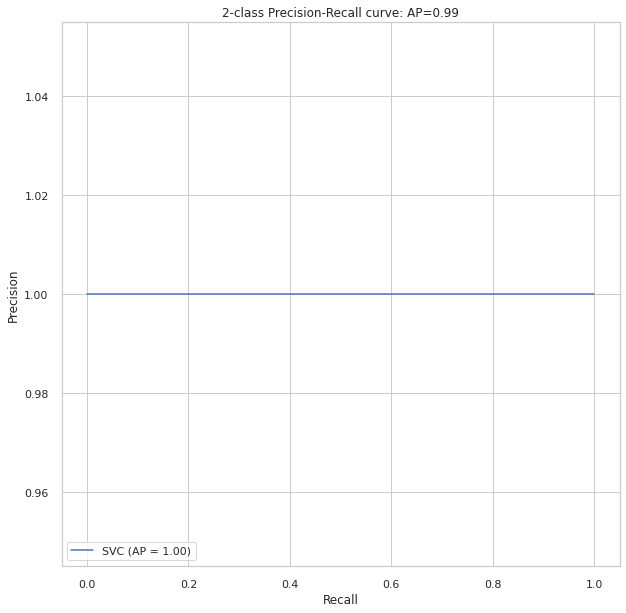

In [ ]:
disp = plot_precision_recall_curve(classifier, x_test_scaled, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ' 'AP={0:0.2f}'.format(average_precision))

#<h2>🏁 Save our prediction as .csv format to submit the prediction to competition...

In [ ]:
Final_Result = pd.DataFrame(list(zip(all_id, y_pred_decision_tree)),columns =['PassengerId', 'Survived']) 

In [ ]:
Final_Result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
Final_Result.to_csv('/content/drive/My Drive/Google Colab/Data_Science/Titanic/Data/Final_Result.csv',index=False)